**Final Data Identification**  

For next Monday, you should aim to identify and load a dataset that you will work on for your final project. This project will involve you exploring this dataset, including using either a classification or regression problem as a modeling component  

Your dataset should have the following criteria  

More than 1000 rows  

A mixture of variable types  

In addition to acquiring the dataset, you should aim to begin your EDA process. Be very clear about stating the questions that your code is engaging. Your final product will be a Jupyter notebook and 5 minute in-class presentation. In advance of this, next Monday plan to introduce your project in 1 minute or less including some visual support  

https://www.kaggle.com/christophercorrea/dc-residential-properties#DC_Properties.csv
 
  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data/DC_Properties.csv')

/Users/mmann/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#cleaning the data before EDA

In [4]:
#cleaning the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [6]:
data = data[data['PRICE'].notnull()] #going to be predicting the price so price != 0!

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 158955
Data columns (total 49 columns):
Unnamed: 0            98216 non-null int64
BATHRM                98216 non-null int64
HF_BATHRM             98216 non-null int64
HEAT                  98216 non-null object
AC                    98216 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 98216 non-null int64
BEDRM                 98216 non-null int64
AYB                   98104 non-null float64
YR_RMDL               57674 non-null float64
EYB                   98216 non-null int64
STORIES               57867 non-null float64
SALEDATE              98215 non-null object
PRICE                 98216 non-null float64
QUALIFIED             98216 non-null object
SALE_NUM              98216 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              98216 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE       

In [8]:
data.head(4)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [9]:
data = data.drop('Unnamed: 0', axis = 1)

In [10]:
data.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [11]:
data.ASSESSMENT_NBHD.value_counts()

Old City 2                      11688
Old City 1                      10066
Columbia Heights                 6790
Petworth                         3577
Brookland                        3376
Deanwood                         3309
Chevy Chase                      3058
Mt. Pleasant                     2706
Congress Heights                 2588
Georgetown                       2324
Capitol Hill                     2301
Central-tri 1                    2180
Kalorama                         2148
Central-tri 3                    2144
Brightwood                       2141
Southwest Waterfront             2057
Randle Heights                   2019
Cleveland Park                   1951
Trinidad                         1920
Fort Dupont Park                 1751
Hillcrest                        1739
Eckington                        1560
American University              1439
Forest Hills                     1423
Woodridge                        1386
Wesley Heights                   1270
16th Street 

In [12]:
data.drop('ASSESSMENT_SUBNBHD', axis = 1)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,38.914680,-77.040832,Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,38.914684,-77.040678,Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,38.914683,-77.040629,Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,38.914331,-77.039715,Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,38.915408,-77.040129,Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,1967,...,38.915017,-77.039903,Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
14,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,1967,...,38.915038,-77.039716,Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
16,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,1967,...,38.915018,-77.039844,Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
19,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,1969,...,38.915019,-77.040138,Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
20,3,1,Hot Water Rad,Y,1.0,14,5,1880.0,2009.0,1987,...,38.911370,-77.033774,Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW


In [13]:
data = data.drop(['X', 'Y'], axis = 1)

In [14]:
data.HEAT.value_counts() #dummies and ac dummies

Forced Air        39423
Hot Water Rad     22854
Warm Cool         17353
Ht Pump           16850
Wall Furnace        707
Water Base Brd      272
Elec Base Brd       249
No Data             211
Electric Rad         93
Air-Oil              69
Gravity Furnac       52
Ind Unit             35
Evp Cool             26
Air Exchng           22
Name: HEAT, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 158955
Data columns (total 46 columns):
BATHRM                98216 non-null int64
HF_BATHRM             98216 non-null int64
HEAT                  98216 non-null object
AC                    98216 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 98216 non-null int64
BEDRM                 98216 non-null int64
AYB                   98104 non-null float64
YR_RMDL               57674 non-null float64
EYB                   98216 non-null int64
STORIES               57867 non-null float64
SALEDATE              98215 non-null object
PRICE                 98216 non-null float64
QUALIFIED             98216 non-null object
SALE_NUM              98216 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              98216 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE                 57900 non-null object
CNDTN      

In [16]:
data[['YR_RMDL', 'AYB','EYB']] #need to clean this --> all ints

,YR_RMDL,AYB,EYB
0,1988.0,1910.0,1972
2,2009.0,1910.0,1984
3,2003.0,1900.0,1984
5,NaN,1913.0,1972
7,2011.0,1906.0,1972
8,2008.0,1908.0,1967
14,2000.0,1917.0,1967
16,2006.0,1908.0,1967
19,2013.0,1908.0,1969
20,2009.0,1880.0,1987


In [17]:
data['YR_RMDL'].fillna(0, inplace = True) #0 means it hasn't happened

In [18]:
data.YR_RMDL.value_counts()

0.0       40542
2006.0     4102
2005.0     3927
2004.0     3141
2007.0     2960
2003.0     2399
2011.0     2239
2014.0     2230
2015.0     2213
2013.0     2163
2010.0     2115
2012.0     2103
2008.0     2102
1980.0     1992
2009.0     1930
2016.0     1877
2017.0     1704
1978.0     1669
2002.0     1370
1979.0     1302
2000.0     1211
1982.0     1136
1981.0     1054
1975.0      766
2001.0      743
1990.0      531
1987.0      521
1983.0      516
1986.0      481
1988.0      478
          ...  
1940.0       10
1945.0        9
1941.0        7
1949.0        7
1942.0        5
1939.0        4
1935.0        4
1944.0        4
1948.0        3
1925.0        3
1936.0        3
1927.0        3
1930.0        2
1900.0        2
1926.0        2
1929.0        2
1931.0        2
1934.0        2
1928.0        1
1932.0        1
20.0          1
1923.0        1
1922.0        1
1921.0        1
1920.0        1
1917.0        1
1910.0        1
1943.0        1
1880.0        1
2019.0        1
Name: YR_RMDL, Length: 1

In [19]:
data['YR_RMDL'] = data.YR_RMDL.astype('int64')

In [20]:
data['REMODELED'] = ['yes' if x == 0 else 'no' for x in data['YR_RMDL']]

In [21]:
data.REMODELED.value_counts()

no     57674
yes    40542
Name: REMODELED, dtype: int64

In [22]:
data['AYB'].fillna(0, inplace = True) #0 means it hasn't happened 

In [23]:
data['AYB'] = data.AYB.astype('int64')

In [24]:
data[data['EYB'].isnull()]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,REMODELED


In [25]:
data[['WARD', 'SQUARE', 'QUADRANT']] #square more specific than ward more specific than quad

,WARD,SQUARE,QUADRANT
0,Ward 2,152,NW
2,Ward 2,152,NW
3,Ward 2,152,NW
5,Ward 2,152,NW
7,Ward 2,152,NW
8,Ward 2,152,NW
14,Ward 2,152,NW
16,Ward 2,152,NW
19,Ward 2,152,NW
20,Ward 2,208,NW


In [26]:
data = data.drop('ASSESSMENT_SUBNBHD', axis =1)

In [27]:
#uninterested & repetitive because the ward and quadrand assessment nbhds are all variables that define the data based on location

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 158955
Data columns (total 46 columns):
BATHRM               98216 non-null int64
HF_BATHRM            98216 non-null int64
HEAT                 98216 non-null object
AC                   98216 non-null object
NUM_UNITS            57900 non-null float64
ROOMS                98216 non-null int64
BEDRM                98216 non-null int64
AYB                  98216 non-null int64
YR_RMDL              98216 non-null int64
EYB                  98216 non-null int64
STORIES              57867 non-null float64
SALEDATE             98215 non-null object
PRICE                98216 non-null float64
QUALIFIED            98216 non-null object
SALE_NUM             98216 non-null int64
GBA                  57900 non-null float64
BLDG_NUM             98216 non-null int64
STYLE                57900 non-null object
STRUCT               57900 non-null object
GRADE                57900 non-null object
CNDTN                57900 non-null

In [29]:
data.ASSESSMENT_NBHD.value_counts()

Old City 2                      11688
Old City 1                      10066
Columbia Heights                 6790
Petworth                         3577
Brookland                        3376
Deanwood                         3309
Chevy Chase                      3058
Mt. Pleasant                     2706
Congress Heights                 2588
Georgetown                       2324
Capitol Hill                     2301
Central-tri 1                    2180
Kalorama                         2148
Central-tri 3                    2144
Brightwood                       2141
Southwest Waterfront             2057
Randle Heights                   2019
Cleveland Park                   1951
Trinidad                         1920
Fort Dupont Park                 1751
Hillcrest                        1739
Eckington                        1560
American University              1439
Forest Hills                     1423
Woodridge                        1386
Wesley Heights                   1270
16th Street 

In [30]:
data = data[data['STYLE'].notnull()] #style, interior, roof = these are some of the variables i definitely want to use in my reg - just find them interesting"

In [31]:
data.HEAT.value_counts() #dummies and ac dummies

Forced Air        21985
Hot Water Rad     20523
Warm Cool         14170
Ht Pump             787
Water Base Brd       94
Wall Furnace         85
Elec Base Brd        70
Air-Oil              43
Gravity Furnac       39
Electric Rad         39
No Data              27
Air Exchng           16
Evp Cool             14
Ind Unit              8
Name: HEAT, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 46 columns):
BATHRM               57900 non-null int64
HF_BATHRM            57900 non-null int64
HEAT                 57900 non-null object
AC                   57900 non-null object
NUM_UNITS            57900 non-null float64
ROOMS                57900 non-null int64
BEDRM                57900 non-null int64
AYB                  57900 non-null int64
YR_RMDL              57900 non-null int64
EYB                  57900 non-null int64
STORIES              57867 non-null float64
SALEDATE             57899 non-null object
PRICE                57900 non-null float64
QUALIFIED            57900 non-null object
SALE_NUM             57900 non-null int64
GBA                  57900 non-null float64
BLDG_NUM             57900 non-null int64
STYLE                57900 non-null object
STRUCT               57900 non-null object
GRADE                57900 non-null object
CNDTN                57900 non-null

In [33]:
data.CMPLX_NUM.value_counts()

Series([], Name: CMPLX_NUM, dtype: int64)

In [34]:
data = data.drop(['CMPLX_NUM', 'LIVING_GBA'], axis = 1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 44 columns):
BATHRM               57900 non-null int64
HF_BATHRM            57900 non-null int64
HEAT                 57900 non-null object
AC                   57900 non-null object
NUM_UNITS            57900 non-null float64
ROOMS                57900 non-null int64
BEDRM                57900 non-null int64
AYB                  57900 non-null int64
YR_RMDL              57900 non-null int64
EYB                  57900 non-null int64
STORIES              57867 non-null float64
SALEDATE             57899 non-null object
PRICE                57900 non-null float64
QUALIFIED            57900 non-null object
SALE_NUM             57900 non-null int64
GBA                  57900 non-null float64
BLDG_NUM             57900 non-null int64
STYLE                57900 non-null object
STRUCT               57900 non-null object
GRADE                57900 non-null object
CNDTN                57900 non-null

In [36]:
data = data[data['QUADRANT'].notnull()]

In [37]:
data = data[(data['STATE'].notnull()) & (data['FULLADDRESS'].notnull()) & (data['STORIES'].notnull())]

In [38]:
# a quick clean ^^^^

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57432 entries, 0 to 106695
Data columns (total 44 columns):
BATHRM               57432 non-null int64
HF_BATHRM            57432 non-null int64
HEAT                 57432 non-null object
AC                   57432 non-null object
NUM_UNITS            57432 non-null float64
ROOMS                57432 non-null int64
BEDRM                57432 non-null int64
AYB                  57432 non-null int64
YR_RMDL              57432 non-null int64
EYB                  57432 non-null int64
STORIES              57432 non-null float64
SALEDATE             57431 non-null object
PRICE                57432 non-null float64
QUALIFIED            57432 non-null object
SALE_NUM             57432 non-null int64
GBA                  57432 non-null float64
BLDG_NUM             57432 non-null int64
STYLE                57432 non-null object
STRUCT               57432 non-null object
GRADE                57432 non-null object
CNDTN                57432 non-null

In [40]:
data = data[(data['SALEDATE'].isnull() == False) & (data['KITCHENS'].isnull() == False)]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57430 entries, 0 to 106695
Data columns (total 44 columns):
BATHRM               57430 non-null int64
HF_BATHRM            57430 non-null int64
HEAT                 57430 non-null object
AC                   57430 non-null object
NUM_UNITS            57430 non-null float64
ROOMS                57430 non-null int64
BEDRM                57430 non-null int64
AYB                  57430 non-null int64
YR_RMDL              57430 non-null int64
EYB                  57430 non-null int64
STORIES              57430 non-null float64
SALEDATE             57430 non-null object
PRICE                57430 non-null float64
QUALIFIED            57430 non-null object
SALE_NUM             57430 non-null int64
GBA                  57430 non-null float64
BLDG_NUM             57430 non-null int64
STYLE                57430 non-null object
STRUCT               57430 non-null object
GRADE                57430 non-null object
CNDTN                57430 non-null

In [42]:
data['ZIPCODE'] = data.ZIPCODE.astype('int64')

In [43]:
data['KITCHENS'] = data.KITCHENS.astype('int64')

In [44]:
#creating variables: AYB, YR_RMDL, EYB\n",
    #AYB: The earliest time the main portion of the building was built\n",
    #YR_RMDL: Year structure was remodeled\n",
    #EYB: The year an improvement was built more recent than actual year built"

In [45]:
##wanting to make the dataset more recent and only look at houses built after 1900

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57430 entries, 0 to 106695
Data columns (total 44 columns):
BATHRM               57430 non-null int64
HF_BATHRM            57430 non-null int64
HEAT                 57430 non-null object
AC                   57430 non-null object
NUM_UNITS            57430 non-null float64
ROOMS                57430 non-null int64
BEDRM                57430 non-null int64
AYB                  57430 non-null int64
YR_RMDL              57430 non-null int64
EYB                  57430 non-null int64
STORIES              57430 non-null float64
SALEDATE             57430 non-null object
PRICE                57430 non-null float64
QUALIFIED            57430 non-null object
SALE_NUM             57430 non-null int64
GBA                  57430 non-null float64
BLDG_NUM             57430 non-null int64
STYLE                57430 non-null object
STRUCT               57430 non-null object
GRADE                57430 non-null object
CNDTN                57430 non-null

In [47]:
data = data[data['AYB'] > 1900]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50950 entries, 0 to 106695
Data columns (total 44 columns):
BATHRM               50950 non-null int64
HF_BATHRM            50950 non-null int64
HEAT                 50950 non-null object
AC                   50950 non-null object
NUM_UNITS            50950 non-null float64
ROOMS                50950 non-null int64
BEDRM                50950 non-null int64
AYB                  50950 non-null int64
YR_RMDL              50950 non-null int64
EYB                  50950 non-null int64
STORIES              50950 non-null float64
SALEDATE             50950 non-null object
PRICE                50950 non-null float64
QUALIFIED            50950 non-null object
SALE_NUM             50950 non-null int64
GBA                  50950 non-null float64
BLDG_NUM             50950 non-null int64
STYLE                50950 non-null object
STRUCT               50950 non-null object
GRADE                50950 non-null object
CNDTN                50950 non-null

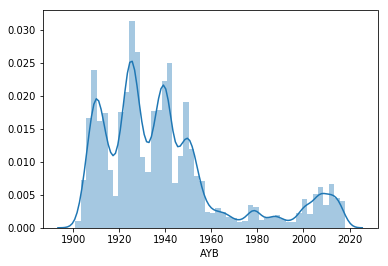

In [49]:
sns.distplot(data.AYB)

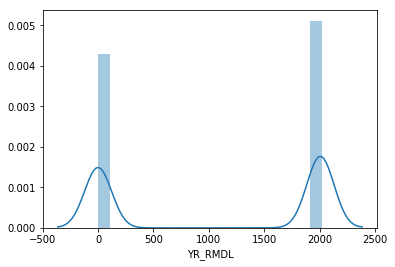

In [50]:
sns.distplot(data.YR_RMDL)

In [51]:
data = data[(data['YR_RMDL'] == 0) | (data['YR_RMDL'] > 1900)]

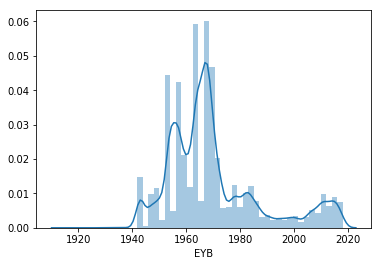

In [52]:
sns.distplot(data.EYB)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1712d080>,
      dtype=object)

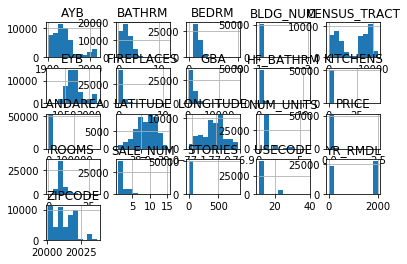

In [53]:
data.hist()

In [54]:
data[['AYB', 'EYB', 'YR_RMDL']]

,AYB,EYB,YR_RMDL
0,1910,1972,1988
2,1910,1984,2009
5,1913,1972,0
7,1906,1972,2011
8,1908,1967,2008
14,1917,1967,2000
16,1908,1967,2006
19,1908,1969,2013
48,1976,1984,0
50,1976,1984,0


In [55]:
#year remodeled in 2000's; 1980-2000 1960-1980, 1940-1960, 1920-1940, 1900-1920\n",
    #dummy variables to look at and way to group variable\n",
    #going to create functions and apply these to create new columns in my dataframe

In [56]:
def eras(data):
    if data['AYB'] < 1910:
        return '1900s'
    elif data['AYB'] < 1920:
        return '1910s'
    elif data['AYB'] < 1930:
        return '1920s'
    elif data['AYB'] < 1940:
        return '1930s'
    elif data['AYB'] < 1950:
        return '1940s'
    elif data['AYB'] < 1960:
        return '1950s'
    elif data['AYB'] < 1970:
        return '1960s'
    elif data['AYB'] < 1980:
        return '1970s'
    elif data['AYB'] < 1990:
        return '1980s'
    elif data['AYB'] < 2000:
        return '1990s'
    elif data['AYB'] < 2010:
        return '2000s'
    else:
        return'2010s'

In [57]:
data[['YR_RMDL', 'AYB','EYB']] #need to clean this --> all ints

,YR_RMDL,AYB,EYB
0,1988,1910,1972
2,2009,1910,1984
5,0,1913,1972
7,2011,1906,1972
8,2008,1908,1967
14,2000,1917,1967
16,2006,1908,1967
19,2013,1908,1969
48,0,1976,1984
50,0,1976,1984


In [58]:
def improvementyr(data):
    if data['EYB'] < 1910:
        return '1900s'
    elif data['EYB'] < 1920:
        return '1910s'
    elif data['EYB'] < 1930:
        return '1920s'
    elif data['EYB'] < 1940:
        return '1930s'
    elif data['EYB'] < 1950:
        return '1940s'
    elif data['EYB'] < 1960:
        return '1950s'
    elif data['EYB'] < 1970:
        return '1960s'
    elif data['EYB'] < 1980:
        return '1970s'
    elif data['EYB'] < 1990:
        return '1980s'
    elif data['EYB'] < 2000:
        return '1990s'
    elif data['EYB'] < 2010:
        return '2000s'
    else:
        return'2010s'

In [59]:
data['BUILT'] = data.apply(improvementyr, axis = 1)

In [60]:
data['BUILT'].value_counts()

1960s    20586
1950s    11144
1970s     5701
1980s     3997
2010s     3442
1940s     2731
2000s     1886
1990s     1441
1930s       17
1920s        2
1910s        1
Name: BUILT, dtype: int64

In [61]:
data['RENOVATIONS'] = data.apply(eras, axis = 1)

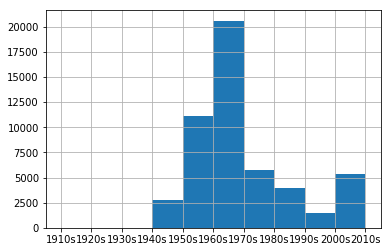

In [62]:
data.BUILT.hist()

In [63]:
#data[data['AYB'].isnull()

In [64]:
data[['REMODELED', 'BUILT', 'EYB']].groupby(data.PRICE).min()

,REMODELED,BUILT,EYB
PRICE,,,
1.0,no,1940s,1947
10.0,yes,1950s,1950
250.0,no,1950s,1950
500.0,yes,1950s,1957
1000.0,no,1950s,1954
2000.0,yes,1950s,1957
3000.0,yes,2000s,2000
3997.0,yes,1940s,1948
4101.0,no,1950s,1959


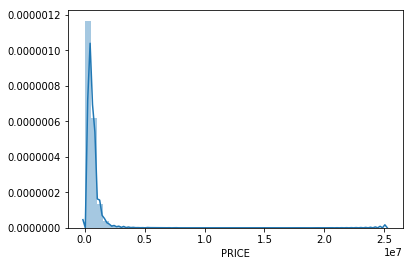

In [65]:
sns.distplot(data.PRICE)

In [66]:
corr = data.corr()

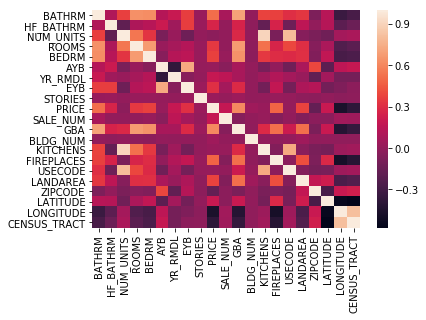

In [67]:
sns.heatmap(corr)

In [68]:
#data = data.drop(['CENSUS_BLOCK', 'CENSUS_TRACT'], axis = 1) #uninterested

In [69]:
corr['PRICE']

BATHRM          0.518137
HF_BATHRM       0.261894
NUM_UNITS      -0.021481
ROOMS           0.343983
BEDRM           0.371653
AYB             0.018299
YR_RMDL         0.189978
EYB             0.315585
STORIES         0.028324
PRICE           1.000000
SALE_NUM        0.183139
GBA             0.610323
BLDG_NUM        0.049944
KITCHENS        0.022571
FIREPLACES      0.483732
USECODE         0.012132
LANDAREA        0.382990
ZIPCODE        -0.165875
LATITUDE        0.200534
LONGITUDE      -0.460718
CENSUS_TRACT   -0.384517
Name: PRICE, dtype: float64

In [70]:
data.ASSESSMENT_NBHD.value_counts()

Old City 1                      5921
Deanwood                        3037
Petworth                        2955
Columbia Heights                2883
Chevy Chase                     2610
Brookland                       2523
Congress Heights                1874
Brightwood                      1804
Randle Heights                  1578
Fort Dupont Park                1556
Trinidad                        1509
Woodridge                       1245
American University             1230
Riggs Park                      1190
Hillcrest                       1103
16th Street Heights             1038
Old City 2                      1004
Anacostia                        876
Mt. Pleasant                     870
Marshall Heights                 798
Eckington                        747
Ledroit Park                     717
Lily Ponds                       712
Capitol Hill                     699
Fort Lincoln                     562
Spring Valley                    541
Cleveland Park                   533
G

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50948 entries, 0 to 106695
Data columns (total 46 columns):
BATHRM               50948 non-null int64
HF_BATHRM            50948 non-null int64
HEAT                 50948 non-null object
AC                   50948 non-null object
NUM_UNITS            50948 non-null float64
ROOMS                50948 non-null int64
BEDRM                50948 non-null int64
AYB                  50948 non-null int64
YR_RMDL              50948 non-null int64
EYB                  50948 non-null int64
STORIES              50948 non-null float64
SALEDATE             50948 non-null object
PRICE                50948 non-null float64
QUALIFIED            50948 non-null object
SALE_NUM             50948 non-null int64
GBA                  50948 non-null float64
BLDG_NUM             50948 non-null int64
STYLE                50948 non-null object
STRUCT               50948 non-null object
GRADE                50948 non-null object
CNDTN                50948 non-null

In [72]:
#going to import datetime and transform data to get a closer look at when houses have been sold

In [73]:
import datetime

In [74]:
data['SALEDATE'] = pd.to_datetime(data['SALEDATE'])

In [75]:
data['SALEYEAR'] = data.SALEDATE.dt.year

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50948 entries, 0 to 106695
Data columns (total 47 columns):
BATHRM               50948 non-null int64
HF_BATHRM            50948 non-null int64
HEAT                 50948 non-null object
AC                   50948 non-null object
NUM_UNITS            50948 non-null float64
ROOMS                50948 non-null int64
BEDRM                50948 non-null int64
AYB                  50948 non-null int64
YR_RMDL              50948 non-null int64
EYB                  50948 non-null int64
STORIES              50948 non-null float64
SALEDATE             50948 non-null datetime64[ns]
PRICE                50948 non-null float64
QUALIFIED            50948 non-null object
SALE_NUM             50948 non-null int64
GBA                  50948 non-null float64
BLDG_NUM             50948 non-null int64
STYLE                50948 non-null object
STRUCT               50948 non-null object
GRADE                50948 non-null object
CNDTN                50948 

In [77]:
data.SALEYEAR.value_counts()

2017    4655
2016    3737
2015    3391
2014    3106
2013    2917
2018    2775
2012    2450
2011    2229
2010    2077
2004    2076
2005    1953
2009    1932
2007    1877
2006    1819
2003    1743
2002    1656
2001    1596
2008    1548
2000    1412
1999    1106
1998    1011
1997     841
1996     666
1992     634
1994     623
1995     590
1993     517
1990       3
1991       2
1984       2
1988       1
1986       1
1985       1
1982       1
Name: SALEYEAR, dtype: int64

In [78]:
data['SALEMONTH'] = data.SALEDATE.dt.month

In [79]:
dchomes = data[data['SALEYEAR'] == 2017]

In [80]:
dchomes.SALEMONTH.value_counts() #going to need to make these month names so they translate to dummy variables

5     473
6     440
7     436
12    425
8     425
11    411
10    406
3     395
9     376
4     343
1     314
2     211
Name: SALEMONTH, dtype: int64

In [81]:
 def salemonth(dchomes):
    if dchomes['SALEMONTH'] == 1:
        return 'January'
    elif dchomes['SALEMONTH'] == 2:
        return 'February'
    elif dchomes['SALEMONTH'] == 3:
        return 'March'
    elif dchomes['SALEMONTH'] == 4:
        return 'April'
    elif dchomes['SALEMONTH'] == 5:
        return 'May'
    elif dchomes['SALEMONTH'] == 6:
        return 'June'
    elif dchomes['SALEMONTH'] == 7:
        return 'July'
    elif dchomes['SALEMONTH'] == 8:
        return 'August'
    elif dchomes['SALEMONTH'] == 9:
        return 'September'
    elif dchomes['SALEMONTH'] == 10:
        return 'October'
    elif dchomes['SALEMONTH'] == 11:
        return 'November'
    else:
        return 'December'

In [82]:
dchomes['SALEMONTH'] = dchomes.apply(salemonth, axis = 1)

/Users/mmann/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[Text(0,0,'August'),
 Text(0,0,'November'),
 Text(0,0,'December'),
 Text(0,0,'April'),
 Text(0,0,'July'),
 Text(0,0,'October'),
 Text(0,0,'February'),
 Text(0,0,'January'),
 Text(0,0,'March'),
 Text(0,0,'May'),
 Text(0,0,'September'),
 Text(0,0,'June')]

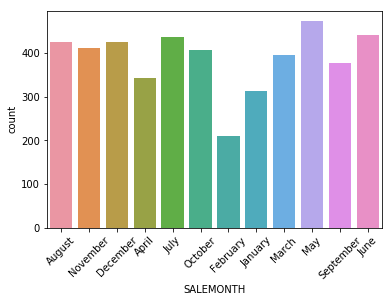

In [83]:
g = sns.countplot(x = dchomes.SALEMONTH)
g.set_xticklabels(g.get_xticklabels(), rotation =45)

In [84]:
data['SALEDATE'].groupby(data.PRICE).min()

PRICE
1.0          2000-02-04
10.0         1998-09-21
250.0        1998-07-09
500.0        1999-10-20
1000.0       1994-02-08
2000.0       2012-06-15
3000.0       1993-08-09
3997.0       2002-06-14
4101.0       2000-07-24
4156.0       1998-12-30
4500.0       2002-04-24
4850.0       1998-10-20
5000.0       1998-11-13
5115.0       2004-08-23
5185.0       2014-06-19
5247.0       2011-06-24
5522.0       2011-06-22
5964.0       2016-06-13
7425.0       1998-02-06
7500.0       2012-02-15
7716.0       2001-07-31
9000.0       1999-12-03
9125.0       2013-04-04
9497.0       1999-12-28
10000.0      2013-04-11
10273.0      1999-05-04
10400.0      2000-03-01
10600.0      1999-12-03
10830.0      2003-01-22
11000.0      1998-01-29
                ...    
6995000.0    2010-05-17
7000000.0    2017-02-17
7050000.0    2009-05-05
7100000.0    2018-03-14
7395000.0    2014-06-13
7500000.0    2007-10-01
7525000.0    2010-11-08
7550000.0    2013-10-23
7576980.0    2018-02-09
7652000.0    2009-12-16
7700000.0 

In [85]:
#DCHOMES --> looking at sold houses from 2017
dchomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 81 to 106695
Data columns (total 48 columns):
BATHRM               4655 non-null int64
HF_BATHRM            4655 non-null int64
HEAT                 4655 non-null object
AC                   4655 non-null object
NUM_UNITS            4655 non-null float64
ROOMS                4655 non-null int64
BEDRM                4655 non-null int64
AYB                  4655 non-null int64
YR_RMDL              4655 non-null int64
EYB                  4655 non-null int64
STORIES              4655 non-null float64
SALEDATE             4655 non-null datetime64[ns]
PRICE                4655 non-null float64
QUALIFIED            4655 non-null object
SALE_NUM             4655 non-null int64
GBA                  4655 non-null float64
BLDG_NUM             4655 non-null int64
STYLE                4655 non-null object
STRUCT               4655 non-null object
GRADE                4655 non-null object
CNDTN                4655 non-null object
EXTWA

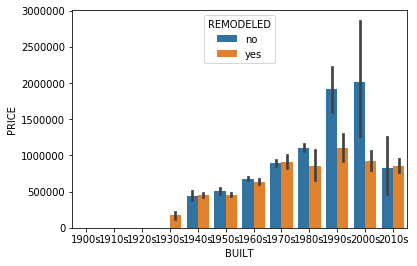

In [86]:
sns.barplot(x = dchomes.BUILT, y = dchomes.PRICE, hue = dchomes.REMODELED, order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

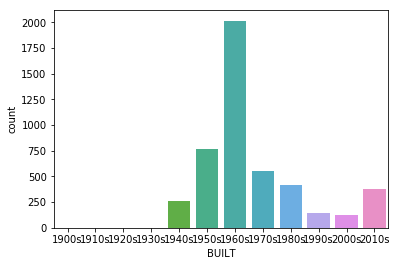

In [87]:
sns.countplot(x = dchomes.BUILT, order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

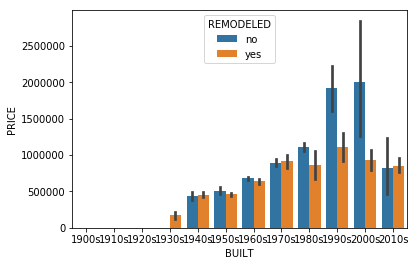

In [88]:
sns.barplot(x = dchomes.BUILT, y = dchomes.PRICE, hue = dchomes.REMODELED, order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

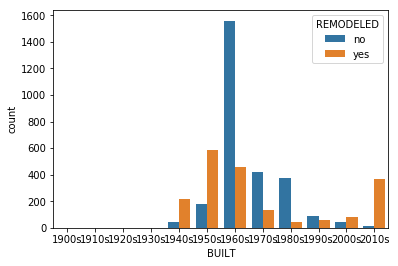

In [89]:
sns.countplot(x = dchomes.BUILT, hue = dchomes.REMODELED, order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

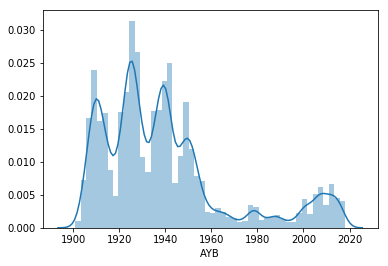

In [90]:
sns.distplot(data.AYB)

[Text(0,0,'1900s'),
 Text(0,0,'1910s'),
 Text(0,0,'1920s'),
 Text(0,0,'1930s'),
 Text(0,0,'1940s'),
 Text(0,0,'1950s'),
 Text(0,0,'1960s'),
 Text(0,0,'1970s'),
 Text(0,0,'1980s'),
 Text(0,0,'1990s'),
 Text(0,0,'2000s'),
 Text(0,0,'2010s')]

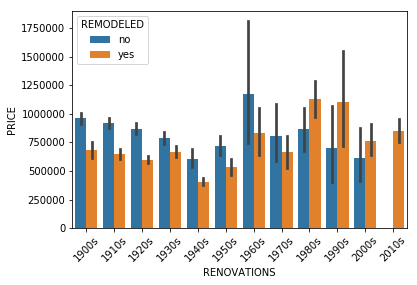

In [91]:
g = sns.barplot(x = dchomes.RENOVATIONS, y = dchomes.PRICE, hue = dchomes.REMODELED, order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
g.set_xticklabels(g.get_xticklabels(), rotation = 45)

[Text(0,0,'2 Story'),
 Text(0,0,'3 Story'),
 Text(0,0,'2.5 Story Fin'),
 Text(0,0,'4 Story'),
 Text(0,0,'2.5 Story Unfin'),
 Text(0,0,'1 Story'),
 Text(0,0,'Default'),
 Text(0,0,'3.5 Story Fin'),
 Text(0,0,'1.5 Story Fin'),
 Text(0,0,'Split Level'),
 Text(0,0,'1.5 Story Unfin'),
 Text(0,0,'Split Foyer')]

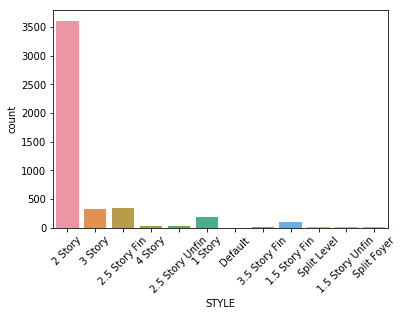

In [92]:
s = sns.countplot(dchomes.STYLE)
s.set_xticklabels(s.get_xticklabels(), rotation = 45)

[Text(0,0,'Warm Cool'),
 Text(0,0,'Hot Water Rad'),
 Text(0,0,'Forced Air'),
 Text(0,0,'Ht Pump'),
 Text(0,0,'Wall Furnace'),
 Text(0,0,'Air-Oil'),
 Text(0,0,'Elec Base Brd'),
 Text(0,0,'Electric Rad'),
 Text(0,0,'Gravity Furnac'),
 Text(0,0,'Ind Unit'),
 Text(0,0,'Evp Cool'),
 Text(0,0,'Water Base Brd'),
 Text(0,0,'No Data'),
 Text(0,0,'Air Exchng')]

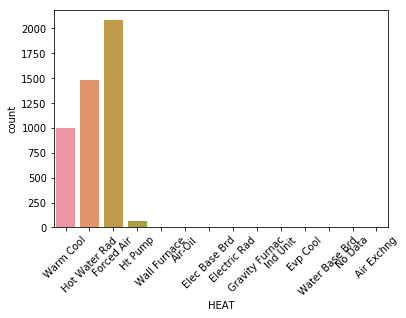

In [93]:
h = sns.countplot(dchomes.HEAT)
h.set_xticklabels(h.get_xticklabels(), rotation = 45)

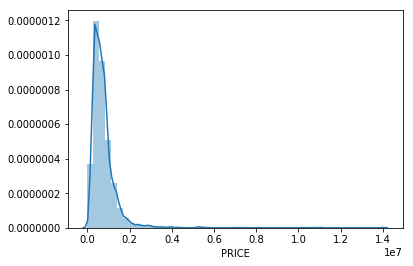

In [94]:
sns.distplot(dchomes.PRICE)

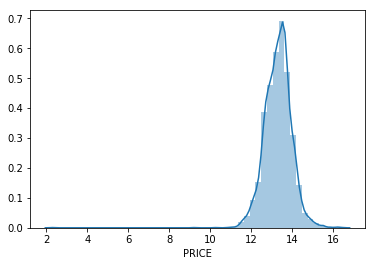

In [95]:
sns.distplot(np.log(dchomes.PRICE))

In [96]:
dchomes.PRICE.mean()

749371.7514500536

In [97]:
dchomes.PRICE.max()

14000000.0

In [98]:
dchomes.PRICE.min()

10.0

In [99]:
#think the solution here is getting rid of outliers...

In [100]:
dchomes.drop('BLDG_NUM', axis = 1)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,REMODELED,BUILT,RENOVATIONS,SALEYEAR,SALEMONTH
81,2,1,Warm Cool,Y,2.0,11,3,1979,2014,1990,...,4201.0,004201 1002,Ward 2,176,NW,no,1990s,1970s,2017,August
90,6,0,Hot Water Rad,N,4.0,18,4,1940,0,1957,...,4201.0,004201 1004,Ward 2,177,NW,yes,1950s,1940s,2017,November
103,4,1,Hot Water Rad,Y,2.0,11,6,1907,2000,1963,...,5500.0,005500 1001,Ward 2,92,NW,no,1960s,1900s,2017,December
138,2,2,Warm Cool,Y,2.0,8,5,1906,2015,1972,...,4201.0,004201 2005,Ward 2,152,NW,no,1970s,1900s,2017,April
149,2,0,Warm Cool,Y,1.0,6,3,1939,2004,1967,...,4202.0,004202 1008,Ward 2,134,NW,no,1960s,1930s,2017,July
254,3,1,Warm Cool,Y,1.0,12,5,1910,2006,1969,...,5500.0,005500 1004,Ward 2,93,NW,no,1960s,1910s,2017,October
310,2,0,Warm Cool,Y,1.0,6,3,1906,0,1972,...,4201.0,004201 2001,Ward 1,150,NW,yes,1970s,1900s,2017,February
426,3,1,Hot Water Rad,Y,3.0,10,4,1910,0,1963,...,4201.0,004201 2002,Ward 1,150,NW,yes,1960s,1910s,2017,October
522,3,1,Hot Water Rad,Y,2.0,8,5,1905,0,1972,...,4300.0,004300 1005,Ward 1,189,NW,yes,1970s,1900s,2017,February
532,3,0,Hot Water Rad,Y,1.0,7,4,1910,0,1960,...,5500.0,005500 2004,Ward 2,49,NW,yes,1960s,1910s,2017,January


In [101]:
dchomes.PRICE.value_counts()

550000.0     41
600000.0     41
350000.0     34
750000.0     32
850000.0     31
500000.0     30
650000.0     27
575000.0     27
700000.0     26
525000.0     26
325000.0     25
250000.0     24
425000.0     24
800000.0     23
330000.0     23
570000.0     23
400000.0     23
1000000.0    23
725000.0     23
1200000.0    21
825000.0     21
925000.0     21
450000.0     21
515000.0     20
625000.0     20
300000.0     20
460000.0     19
420000.0     19
950000.0     19
365000.0     19
             ..
1286000.0     1
428000.0      1
749500.0      1
1111000.0     1
710400.0      1
393900.0      1
515310.0      1
157250.0      1
447436.0      1
329705.0      1
1047000.0     1
874999.0      1
784900.0      1
184450.0      1
458000.0      1
339222.0      1
356630.0      1
359700.0      1
618330.0      1
561000.0      1
149000.0      1
446400.0      1
596500.0      1
358330.0      1
987000.0      1
131000.0      1
675713.0      1
351500.0      1
3200000.0     1
782525.0      1
Name: PRICE, Length: 173

In [102]:
#variables
#BATHRM, HF_BATHRM, HEAT, AC , ROOMS , built, , remodeled, ASSessment nbhd ward, quad, zip?, sale month. land area
#kitchens int wall ext wall roof

#price

In [103]:
dchomes = dchomes[(dchomes['AC'] =='N') | (dchomes['AC'] == 'Y')]

In [104]:
dchomes.AC.value_counts()

Y    3467
N    1187
Name: AC, dtype: int64

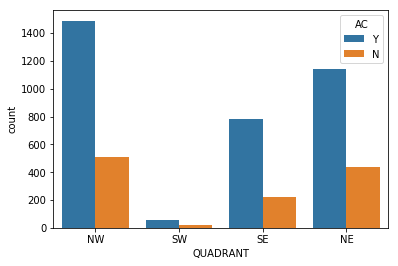

In [105]:
sns.countplot(x = dchomes.QUADRANT, hue = dchomes.AC)

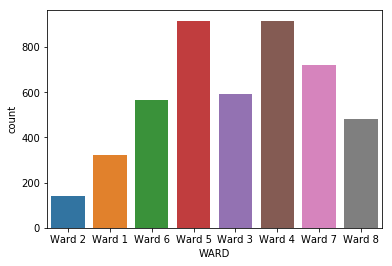

In [106]:
sns.countplot(x = dchomes.WARD)

In [107]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(dchomes)
#sizing...

In [108]:
#homes another new df - takes from dchomes the variables i want to look at in my regression for price

In [109]:
homes = dchomes[['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'PRICE', 'STYLE', 'CNDTN', 'EXTWALL', 'INTWALL', 'ROOF', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'ASSESSMENT_NBHD', 'WARD', 'SQUARE', 'QUADRANT', 'REMODELED', 'BUILT', 'SALEMONTH']]

In [110]:
homes.CNDTN.value_counts()

Good         2024
Average      1574
Very Good     901
Excellent     107
Fair           38
Poor           10
Name: CNDTN, dtype: int64

In [111]:
#making the condition ordinal values as there is a value assigned with the condition

In [112]:
cndtn_dict = {'Poor':0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}

In [113]:
homes = homes.replace({'CNDTN': cndtn_dict})

In [114]:
homes.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,PRICE,STYLE,CNDTN,EXTWALL,INTWALL,...,KITCHENS,FIREPLACES,LANDAREA,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT,REMODELED,BUILT,SALEMONTH
81,2,1,Warm Cool,Y,11,1363000.0,2 Story,3,Common Brick,Hardwood,...,2,2,1320,Old City 2,Ward 2,176,NW,no,1990s,August
90,6,0,Hot Water Rad,N,18,1500000.0,3 Story,2,Common Brick,Hardwood,...,4,0,1760,Old City 2,Ward 2,177,NW,yes,1950s,November
103,4,1,Hot Water Rad,Y,11,1844970.0,3 Story,3,Common Brick,Hardwood,...,2,2,1224,Old City 2,Ward 2,92,NW,no,1960s,December
138,2,2,Warm Cool,Y,8,1925000.0,3 Story,3,Common Brick,Hardwood,...,2,1,1627,Old City 2,Ward 2,152,NW,no,1970s,April
149,2,0,Warm Cool,Y,6,950000.0,2 Story,3,Common Brick,Hardwood,...,1,1,652,Old City 2,Ward 2,134,NW,no,1960s,July


**KEY**  
    homes: the dataframe i want to work with  
    dc_reg: X variables from homes - all variables except dropped dummies & price  
    y: price  
    
**REGRESSION GOALS**  
    1 - Basic Regression with X & Y  
    2 - Implement train test split & see how the different regressors do in comparisson to my DummyRegressor  
    3 - Use Lasso to help narrow down my parameters  
    4 - Run through pipeline by scaling and boosting/bagging variables    
    5 - GridSearch to find optimization of variables"

In [115]:
#all residential , all dc

In [116]:
#dc_reg is my datatable including the dummy variables

In [117]:
dc_reg = pd.get_dummies(homes, drop_first = True)

In [118]:
#x & y --> estimating the price form the dataset in l of dummy variables

In [119]:
dc_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4654 entries, 81 to 106695
Columns: 2097 entries, BATHRM to SALEMONTH_September
dtypes: float64(1), int64(7), uint8(2089)
memory usage: 9.6 MB


In [120]:
X = dc_reg.drop('PRICE', axis = 1)
y = dc_reg.PRICE

In [121]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.feature_selection import RFE, SelectFromModel, SelectPercentile

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [123]:
#creating basic functions for a regressor with and without train test split
#baseline to compare more detailed models to

In [124]:
def regressXY(model):
    m = model
    m.fit(X,y)
    pred = m.predict(X)
    print (model)
    print ('mse: ', mean_squared_error(y, pred))
    print ('rmse: ', np.sqrt(mean_squared_error(y, pred)))

In [125]:
def regress_tts(model):
    m = model
    m.fit(X_train,y_train)
    pred = m.predict(X_test)
    print (model)
    print ('mse: ', mean_squared_error(y_test, pred))
    print ('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

In [126]:
regressXY(LinearRegression())
regress_tts(LinearRegression())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
mse:  19712578092.810272
rmse:  140401.48892661458
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
mse:  4.476360889545678e+25
rmse:  6690561179412.141


In [127]:
regressXY(DummyRegressor())
regress_tts(DummyRegressor())

DummyRegressor(constant=None, quantile=None, strategy='mean')
mse:  423708985573.39233
rmse:  650929.3245609637
DummyRegressor(constant=None, quantile=None, strategy='mean')
mse:  705717244332.7021
rmse:  840069.7853944649


In [128]:
regressXY(DecisionTreeRegressor())
regress_tts(DecisionTreeRegressor())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
mse:  136332133.7372511
rmse:  11676.135222634719
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
mse:  259036005028.4392
rmse:  508955.798698118


In [129]:
regressXY(Lasso())
regress_tts(Lasso())

/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
mse:  19725732128.751236
rmse:  140448.32547507013
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
mse:  287146706145.9233
rmse:  535860.7152478369


/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [130]:
#350-400k when doing tts

In [131]:
dchomes

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,REMODELED,BUILT,RENOVATIONS,SALEYEAR,SALEMONTH
81,2,1,Warm Cool,Y,2.0,11,3,1979,2014,1990,...,4201.0,004201 1002,Ward 2,176,NW,no,1990s,1970s,2017,August
90,6,0,Hot Water Rad,N,4.0,18,4,1940,0,1957,...,4201.0,004201 1004,Ward 2,177,NW,yes,1950s,1940s,2017,November
103,4,1,Hot Water Rad,Y,2.0,11,6,1907,2000,1963,...,5500.0,005500 1001,Ward 2,92,NW,no,1960s,1900s,2017,December
138,2,2,Warm Cool,Y,2.0,8,5,1906,2015,1972,...,4201.0,004201 2005,Ward 2,152,NW,no,1970s,1900s,2017,April
149,2,0,Warm Cool,Y,1.0,6,3,1939,2004,1967,...,4202.0,004202 1008,Ward 2,134,NW,no,1960s,1930s,2017,July
254,3,1,Warm Cool,Y,1.0,12,5,1910,2006,1969,...,5500.0,005500 1004,Ward 2,93,NW,no,1960s,1910s,2017,October
310,2,0,Warm Cool,Y,1.0,6,3,1906,0,1972,...,4201.0,004201 2001,Ward 1,150,NW,yes,1970s,1900s,2017,February
426,3,1,Hot Water Rad,Y,3.0,10,4,1910,0,1963,...,4201.0,004201 2002,Ward 1,150,NW,yes,1960s,1910s,2017,October
522,3,1,Hot Water Rad,Y,2.0,8,5,1905,0,1972,...,4300.0,004300 1005,Ward 1,189,NW,yes,1970s,1900s,2017,February
532,3,0,Hot Water Rad,Y,1.0,7,4,1910,0,1960,...,5500.0,005500 2004,Ward 2,49,NW,yes,1960s,1910s,2017,January


In [132]:
#piperegressor: testing functions with transformations

In [133]:
def piperegressor(transformer, model):
    pipe = make_pipeline(transformer, model)
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print (transformer, model)
    print ('mse: ', mean_squared_error(y_test, pred))
    print ('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

In [134]:
piperegressor(StandardScaler(), RandomForestRegressor())

StandardScaler(copy=True, with_mean=True, with_std=True) RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
mse:  237910585447.87442
rmse:  487760.7871158509


In [135]:
piperegressor(SelectFromModel(Lasso()), RandomForestRegressor())

/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None) RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
mse:  253556938883.9428
rmse:  503544.37628072343


In [136]:
piperegressor(StandardScaler(), KNeighborsRegressor(n_neighbors = 5))

StandardScaler(copy=True, with_mean=True, with_std=True) KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
mse:  629415217592.6897
rmse:  793356.9295044254


In [137]:
piperegressor(SelectFromModel(DecisionTreeRegressor()), RandomForestRegressor())

SelectFromModel(estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
        norm_order=1, prefit=False, threshold=None) RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
mse:  261828363227.60046
rmse:  511691.6681240769


In [138]:
def ensembles(features, model):
    pipe = make_pipeline(StandardScaler(), features, model)
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print ('mse: ', mean_squared_error(y_test, pred))
    print ('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

In [139]:
ensembles(SelectFromModel(DecisionTreeRegressor()), RandomForestRegressor())

mse:  265258299095.2732
rmse:  515032.32820403925


In [140]:
ensembles(SelectPercentile(percentile = 50), RandomForestRegressor())

/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   9   12   15   27   57   64  136  137  138  140  142  146  149  150
  151  152  160  166  176  180  193  199  202  205  206  210  211  214
  215  216  222  228  235  241  244  250  253  254  255  256  257  262
  268  269  271  274  281  282  290  293  296  298  301  302  321  335
  341  342  375  377  378  384  388  390  391  397  403  405  409  414
  417  419  421  422  426  427  429  430  432  441  446  447  451  452
  454  456  465  471  473  478  479  481  482  487  489  490  492  493
  496  498  500  505  507  509  511  517  519  520  522  528  530  533
  537  541  545  546  547  550  551  555  558  559  560  563  566  576
  581  585  590  593  594  596  599  600  603  604  606  608  610  612
  618  619  621  622  623  627  628  630  639  642  643  644  646  654
  657  658  664  668  670  672  673  676  677  678  685  688  691  692
  694  696  698  699

mse:  230604585999.71832
rmse:  480213.06312898063


In [141]:
ensembles(SelectFromModel(Lasso()), RandomForestRegressor())

/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


mse:  246768527041.56808
rmse:  496758.0165851056


In [142]:
#ensembles(RFE(LinearRegression()), RandomForestRegressor())

In [143]:
#'selectfrommodel__estimator': [RandomForestRegressor(), LinearRegression(), Lasso()\n",
    #''max_depth': range(1,20)\n",''}"

In [144]:
#help below

In [145]:
def gridregressor(model):
    grid = GridSearchCV(piperegressor, param_grid = params) #not sure if this is correct...\n",
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    best.fit(X_train, y_train)
    pred = best.predict(X_test)
    print (best)
    print ('mse: ', mean_squared_error(y_test, pred))
    print ('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

In [146]:
#select from model estimator
params = {'selectfrommodel__estimator': [RandomForestRegressor(), LinearRegression(), Lasso(), DecisionTreeRegressor()]}
model_pipe = make_pipeline(StandardScaler(), SelectFromModel(estimator = params), RandomForestRegressor())
grid = GridSearchCV (model_pipe, param_grid = params)
grid.fit(X_train, y_train)
best = grid.best_estimator_
best.fit(X_train, y_train)
pred = best.predict(X_test)
print (best)
print ('mse: ', mean_squared_error(y_test, pred))
print ('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mmann/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selectfrommodel', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.00...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])
mse:  229475640483.07498
rmse:  479036.1578034324
